In [1]:
%matplotlib inline
import numpy as np


import plotting_helpers as plots
import utility_functions as utils
import csd_profile as CSD
from KCSD import KCSD1D

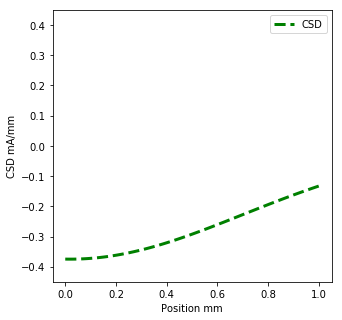

In [2]:
# Lets say we create a random CSD source
csd_profile = CSD.gauss_1d_mono #Type of the CSD Source
start_x, end_x, csd_res = [0.,1.,100]    
t_csd_x, true_csd = utils.generate_csd_1D(csd_profile, 
                                          csd_seed=11, 
                                          start_x=start_x, 
                                          end_x=end_x, 
                                          res_x=csd_res)
plots.show_csd_1D(t_csd_x, true_csd)

(30, 1)


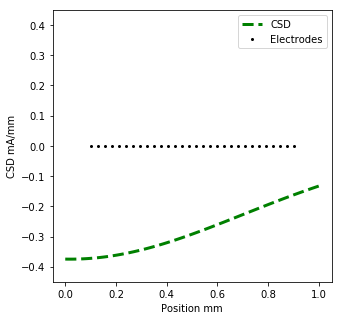

In [3]:
 #Lets add some electrodes which span the CSD space                                                                                                                                                                                                    
ele_count = 30
ele_lims = [0.1, 0.9]
ele_pos = utils.generate_electrodes_1D(ele_lims, ele_count)
print(ele_pos.shape)
plots.show_csd_1D(t_csd_x, true_csd, show_ele=ele_pos)

(30, 1)


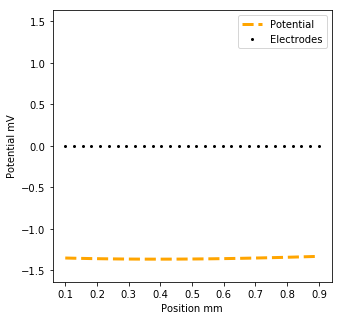

In [4]:
# Lets emulate the case when some of the electrodes are broken / used for stimulation

# Lets compute the potential recorded by these electrodes due to the CSD
r = 10.
sigma = 1.
pots = utils.calculate_potential_1D(t_csd_x, true_csd, ele_pos, r, sigma)
print(pots.shape)
plots.show_pot_1D(ele_pos, pots)

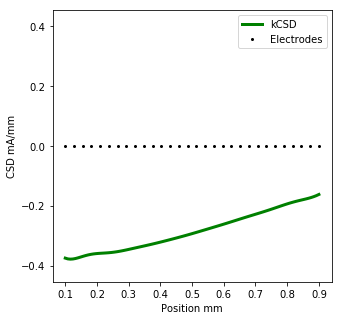

In [5]:
#Lets do KCSD!
k = KCSD1D(ele_pos.reshape((30,1)), pots.reshape((30,1)), sigma=1., h=10., n_src_init=300) 
est_csd = k.values()
est_pos = k.estm_x
plots.show_csd_1D(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

('Cross validating R (all lambda) :', 0.20000000000000001)
('Cross validating R (all lambda) :', 0.21000000000000002)
('Cross validating R (all lambda) :', 0.22000000000000003)
('Cross validating R (all lambda) :', 0.23000000000000004)
('Cross validating R (all lambda) :', 0.24000000000000005)
('Cross validating R (all lambda) :', 0.25000000000000006)
('Cross validating R (all lambda) :', 0.26000000000000006)
('Cross validating R (all lambda) :', 0.27000000000000007)
('Cross validating R (all lambda) :', 0.28000000000000008)
('Cross validating R (all lambda) :', 0.29000000000000009)
('Cross validating R (all lambda) :', 0.3000000000000001)
('Cross validating R (all lambda) :', 0.31000000000000011)
('Cross validating R (all lambda) :', 0.32000000000000012)
('Cross validating R (all lambda) :', 0.33000000000000013)
('Cross validating R (all lambda) :', 0.34000000000000014)
('Cross validating R (all lambda) :', 0.35000000000000014)
('Cross validating R (all lambda) :', 0.36000000000000015

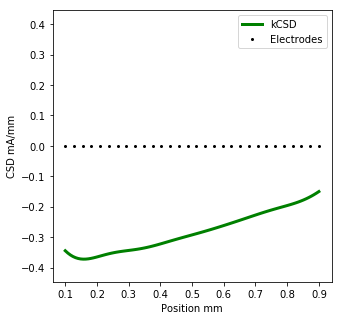

In [8]:
k.cross_validate(Rs=np.arange(0.2,0.4,0.01), lambdas=np.logspace(15,-25, 35))
est_csd = k.values()
est_pos = k.estm_x
plots.show_csd_1D(est_pos, est_csd, show_ele=ele_pos, show_kcsd=True)

In [7]:
#RMS of estimation - gives estimate of how good the reconstruction was
chr_x, test_csd = utils.generate_csd_1D(csd_profile, csd_seed,
                                        start_x=x_lims[0], end_x=x_lims[1], 
                                        res_x=int((x_lims[1]-x_lims[0])/gdX))
rms = np.linalg.norm(abs(test_csd - est_csd[:,0]))
rms /= np.linalg.norm(test_csd)


NameError: name 'csd_seed' is not defined